<a href="https://colab.research.google.com/github/Mrinal7862/MultipleLinearRegressions/blob/main/multipleLinearRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression >> It models the relationship between dependant variable Y and more than one independant varible X

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_diabetes

In [7]:
#read dataset

diabities = load_diabetes()

In [28]:
 diabities

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [29]:
print(diabities.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [30]:
# To protect Disease progression one after the release

In [31]:
diabities.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [32]:
diabities.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [33]:
diabities.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [37]:
data = pd.DataFrame(diabities.data, columns=diabities.feature_names)

In [38]:
data['target'] = diabities.target

In [39]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [41]:
#EDA and data prep
#divide into X and Y

In [42]:
X = data.drop('target', axis=1)
Y= data['target']

In [44]:
X,Y

(          age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0.019907 

In [45]:
#split the data into train and split
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062917,0.040343
37,-0.009147,-0.044642,0.011039,-0.057313,-0.024960,-0.042963,0.030232,-0.039493,0.017036,-0.005220
170,0.023546,0.050680,-0.020218,-0.036656,-0.013953,-0.015092,0.059685,-0.039493,-0.096435,-0.017646
400,-0.023677,-0.044642,0.045529,0.090729,-0.018080,-0.035447,0.070730,-0.039493,-0.034522,-0.009362
286,-0.038207,-0.044642,-0.054707,-0.077970,-0.033216,-0.086490,0.140681,-0.076395,-0.019198,-0.005220
...,...,...,...,...,...,...,...,...,...,...
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025953,-0.001078
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061176,-0.013504
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646
15,-0.052738,0.050680,-0.018062,0.080401,0.089244,0.107662,-0.039719,0.108111,0.036060,-0.042499


In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [49]:
data.shape

(442, 11)

In [50]:
#Scaling >> Standardization >> fit_transform >> train, transform >> test

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scalar = StandardScaler()

In [54]:
#Always perform scaling after train test split
#y/target variable should not be scaled
#avoid scaling categorical features

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [55]:
X_train

array([[-3.69153471e-02, -9.10502907e-01, -1.43131285e+00, ...,
        -8.02763086e-01, -1.30948770e+00,  8.80058856e-01],
       [-1.87564105e-01, -9.10502907e-01,  2.76470633e-01, ...,
        -8.02763086e-01,  3.62380491e-01, -9.07560695e-02],
       [ 4.90355304e-01,  1.09829413e+00, -3.83872314e-01, ...,
        -8.02763086e-01, -2.01037235e+00, -3.55523776e-01],
       ...,
       [ 1.31892347e+00,  1.09829413e+00, -4.23156172e-02, ...,
         2.23483843e-03,  1.77291801e+00, -3.55523776e-01],
       [-1.09145665e+00,  1.09829413e+00, -3.38331421e-01, ...,
         2.41722861e+00,  7.60190195e-01, -8.85059190e-01],
       [ 3.84090316e-02,  1.09829413e+00,  1.30114072e+00, ...,
         2.41722861e+00,  1.44868500e+00,  2.73343280e+00]])

In [56]:
X_test

array([[ 1.39424785e+00, -9.10502907e-01,  1.17077508e-01,
         7.55914952e-01,  1.06047137e+00,  7.03754617e-01,
         1.44309723e+00, -8.02763086e-01, -6.64662213e-03,
         4.38779344e-01],
       [-1.61872730e+00,  1.09829413e+00,  1.68823831e+00,
         1.11748207e+00,  1.66963637e+00,  1.40650445e+00,
         5.11314612e-01,  2.23483843e-03,  8.56640463e-01,
        -1.79011972e-01],
       [ 8.66977198e-01,  1.09829413e+00, -2.70020081e-01,
        -3.52649826e-01, -9.98429071e-02,  2.19785394e-01,
        -3.42819455e-01,  1.83347969e-02, -2.42625737e-01,
         8.57557351e-02],
       [-9.40807892e-01, -9.10502907e-01, -9.75903921e-01,
        -4.01099820e-01,  1.61885207e-02, -2.97332405e-01,
         1.36544868e+00, -8.02763086e-01, -5.12343385e-01,
         4.38779344e-01],
       [ 1.89057789e-01,  1.09829413e+00,  1.50607474e+00,
         1.26210891e+00,  3.93290661e-01, -4.49815859e-01,
        -1.04165642e+00,  8.07232763e-01,  2.16615300e+00,
         1.

ValueError: x and y must be the same size

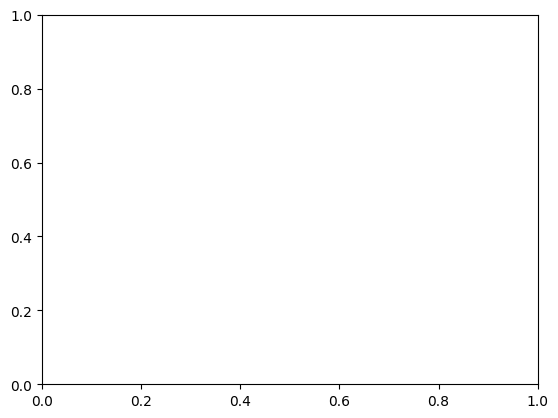

In [57]:
#scaling is optional >> why? it doesn't affect the distribution of data

plt.scatter(X_train, y_train)

In [58]:
#model training
from sklearn.linear_model import LinearRegression

#linear regression parameters:
#fit_intercept >> The best fit line will have intercept, by default it is true
#copy__X >> copy the original X_train and then build the model, dont modify the original data,by default>>true
#n_jobs >> processor you want to use
#positive>> you want all of your coefficient to be positive


#After building the model, you have attributes of the mode
#coef
#intercept

In [59]:
regressor = LinearRegression()

In [60]:
regressor

LinearRegression()

In [61]:
#training the model
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
print(f"The coefficient of the model is {regressor.coef_}")
print(f"The intercept of the model is {regressor.intercept_}")

The coefficient of the model is [ -0.44167852  -9.74925101  24.45708556  16.21696005 -42.47943369
  26.50873866   7.29670649   5.80936975  41.18126358   2.46027617]
The intercept of the model is 150.45892351274787


In [65]:
y_pred = regressor.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
mse = mean_squared_error(y_test, y_pred)

In [68]:
mse

3094.4566715660626

In [69]:
rsq = r2_score(y_test, y_pred)

In [70]:
rsq

0.4399338661568968